<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-4-select-important-features/U2_S4_D4_Cross_Validation_AND_Feature_Selection_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week Material

In [0]:
#Turn off for now data conversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
# X = data.drop(columns='y')
# y = data['y'] == 'yes'
#weather = pd.read_csv(url, parse_dates=['DATE']).set_index('DATE')
#weather['2015':'2018'].TMAX.plot()

In [0]:
#Train-validation-test split
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


#check the resulting arrays  
[array.shape for array in (X_train, X_val, X_test, y_train, y_val, y_test)]
y_train.mean(), y_val.mean(), y_test.mean()

#plot the target
y.rolling(500).mean().plot();

y_val.value_counts(normalize=True);
y_train.describe()

sns.countplot(x='y', data=df, palette='hls')
plt.show();


import seaborn as sns
sns.distplot(y_train);

In [0]:
#majority class baseline
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = np.full(shape=y_test.shape, fill_value=majority_class)

accuracy_score(y_test, y_pred)

In [0]:
#mean baseline

import numpy as np
y_pred = np.full(shape=y_train.shape, fill_value=y_train.mean())
mean_absolute_error(y_train, y_pred)

In [0]:
print(classification_report(y_val, y_pred))

In [0]:
#mean baseline
from sklearn.metrics import mean_absolute_error

predicted = [df[column]mean()] * len(df)  
mean_absolute_error(df[target], predicted)

In [0]:
# Make a feature for yesterday's total
daily['Total_yesterday'] = daily.Total.shift(1)
daily = daily.drop(index=daily.index[0])

In [0]:
X_train_numeric = X_train.select_dtypes(np.number)

In [0]:
#logistic regression model with onehotencoder and standardscaler
!pip install category_encoders

import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs')
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)


#visualize coefficients
plt.figure(figsize=(10,30))
plt.title('Coefficients')

coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=10)
scores.mean(), scores.std()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
#it can be 'balanced', None, or in a form of dictionary
class_weight = {0: 1, 1: 10}

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

In [0]:
print(classification_report(y_val, y_pred))

In [0]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(pipeline)
cm.score(X_val, y_val)
cm.poof()

In [0]:
#Visualize confusion matrix using sklearn

def confusion_viz(y_true, y_pred, normalize=False):
  
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = confusion_matrix(y_true, y_pred, labels = [0,1])
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
   
    return sns.heatmap(cm, annot=True, 
                       fmt='.4g', linewidths=1, linecolor='grey', 
                       square=True, 
                       xticklabels=['Predicted\nNEGATIVE', 'Predicted\nPOSITIVE'], 
                       yticklabels=['Actual\nNEGATIVE', 'Actual\nPOSITIVE'])

confusion_viz(y_val, y_pred);

#### Recall =  Actual TRUE / (Actual TRUE + Predicted TRUE)


#### Precision = Actual TRUE / (Actual TRUE + Actual FALSE)


#### Accuracy score  = (Actual TRUE + Actual FALSE) / (Actual TRUE + Actual FALSE + Negative TRUE + Negative FALSE)


#### Class (im)balance = Actual FALSE /  (Actual TRUE + Actual FALSE + Negative TRUE + Negative FALSE)




In [0]:
#recall
from sklearn.metrics import recall_score
recall_score(y_val, y_pred)


#precision
from sklearn.metrics import precision_score
precision_score(y_val, y_pred)

#accuracy
accuracy_score(y_val, y_pred)


#class (im)balance
y_val.value_counts(normalize=True)

In [0]:
#logistic regression summary
import statsmodels.api as sm
logit_model=sm.Logit(yf,Xf)
result=logit_model.fit()
print(result.summary2())

In [0]:
#linear regression summary
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train))
print(model.fit().summary());

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': [0, 1, 2, 3]
}

gridsearch = GridSearchCV(PolynomialRegression(), param_grid=param_grid, 
                          scoring='neg_mean_absolute_error', cv=3, 
                          return_train_score=True, verbose=10)

gridsearch.fit(X_train, y_train)

In [0]:
%%time

param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [4, 5], 
    'criterion': ['mse', 'mae']
}

gridsearch = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, 
                          scoring='neg_mean_absolute_error', cv=3, 
                          return_train_score=True, verbose=10)

gridsearch.fit(X_train, y_train)

In [0]:
results = pd.DataFrame(gridsearch.cv_results_)
results.sort_values(by='rank_test_score').head(1)

In [0]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by='rank_test_score')

_Lambda School Data Science - Model Validation_

## Example solution to the Cross-Validation assignment — plus Feature Selection!

See also Sebastian Raschka's example, [Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb).

In [0]:
# We'll modify a project from Python Data Science Handbook by Jake VanderPlas
# https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Example:-Predicting-Bicycle-Traffic
    
# Predicting Bicycle Traffic

# As an example, let's take a look at whether we can predict the number of 
# bicycle trips across Seattle's Fremont Bridge based on weather, season, 
# and other factors.

# We will join the bike data with another dataset, and try to determine the 
# extent to which weather and seasonal factors—temperature, precipitation, 
# and daylight hours—affect the volume of bicycle traffic through this corridor. 
# Fortunately, the NOAA makes available their daily weather station data 
# (I used station ID USW00024233) and we can easily use Pandas to join 
# the two data sources.


import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


def load(): 
    fremont_bridge = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
    
    bicycle_weather = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv'

    counts = pd.read_csv(fremont_bridge, index_col='Date', parse_dates=True, 
                         infer_datetime_format=True)

    weather = pd.read_csv(bicycle_weather, index_col='DATE', parse_dates=True, 
                          infer_datetime_format=True)

    daily = counts.resample('d').sum()
    daily['Total'] = daily.sum(axis=1)
    daily = daily[['Total']] # remove other columns

    weather_columns = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND']
    daily = daily.join(weather[weather_columns], how='inner')
    
    # Make a feature for yesterday's total
    daily['Total_yesterday'] = daily.Total.shift(1)
    daily = daily.drop(index=daily.index[0])
    
    return daily

    
def split(daily):
    # Hold out an "out-of-time" test set, from the last 100 days of data
    
    train = daily[:-100]
    test = daily[-100:]
    
    X_train = train.drop(columns='Total')
    y_train = train.Total

    X_test  = test.drop(columns='Total')
    y_test  = test.Total
    
    return X_train, X_test, y_train, y_test


def jake_wrangle(X):  
    X = X.copy()

    # patterns of use generally vary from day to day; 
    # let's add binary columns that indicate the day of the week:
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for i, day in enumerate(days):
        X[day] = (X.index.dayofweek == i).astype(float)


    # we might expect riders to behave differently on holidays; 
    # let's add an indicator of this as well:
    from pandas.tseries.holiday import USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays('2012', '2016')
    X = X.join(pd.Series(1, index=holidays, name='holiday'))
    X['holiday'].fillna(0, inplace=True)


    # We also might suspect that the hours of daylight would affect 
    # how many people ride; let's use the standard astronomical calculation 
    # to add this information:
    def hours_of_daylight(date, axis=23.44, latitude=47.61):
        """Compute the hours of daylight for the given date"""
        days = (date - pd.datetime(2000, 12, 21)).days
        m = (1. - np.tan(np.radians(latitude))
             * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
        return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

    X['daylight_hrs'] = list(map(hours_of_daylight, X.index))


    # temperatures are in 1/10 deg C; convert to C
    X['TMIN'] /= 10
    X['TMAX'] /= 10

    # We can also calcuate the average temperature.
    X['Temp (C)'] = 0.5 * (X['TMIN'] + X['TMAX'])


    # precip is in 1/10 mm; convert to inches
    X['PRCP'] /= 254

    # In addition to the inches of precipitation, let's add a flag that 
    # indicates whether a day is dry (has zero precipitation):
    X['dry day'] = (X['PRCP'] == 0).astype(int)


    # Let's add a counter that increases from day 1, and measures how many 
    # years have passed. This will let us measure any observed annual increase 
    # or decrease in daily crossings:
    X['annual'] = (X.index - X.index[0]).days / 365.

    return X


def wrangle(X):
    # From Daniel H (DS1 KotH) & friends!
    X = X.copy()
    X = X.replace(-9999, 0)
    X = jake_wrangle(X)
    
    X['PRCP_yest'] = X.PRCP.shift(1).fillna(X.PRCP.mean())
    X['Windchill'] = (((X['Temp (C)'] * (9/5) + 32) * .6215) + 34.74) - (35.75 * (X['AWND']** .16)) + (.4275 * (X['Temp (C)'])) * (X['AWND'] ** .16)
    X['Rl_Cold'] = (((X['Temp (C)'] * (9/5) + 32) - X['Windchill']) -32) * (5/9)
    X['TMIN_ln'] = X['TMIN'] **2
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i, month in enumerate(months):
        X[month] = (X.index.month == i+1).astype(float)
    
    return X

In [0]:
# Download and join data into a dataframe
data = load()

In [0]:
%%time

# Split data into train and test
X_train, X_test, y_train, y_test = split(data)

# Do the same wrangling to X_train and X_test
X_train = wrangle(X_train)
X_test  = wrangle(X_test)

# Define an estimator and param_grid
pipe = make_pipeline(
    RobustScaler(), 
    SelectKBest(f_regression), 
    Ridge())

param_grid = {
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': np.arange(1,30)
}

# Fit on the train set, with grid search cross-validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, 
                  scoring='neg_mean_absolute_error', 
                  return_train_score=True,
                  verbose=1)

gs.fit(X_train, y_train)
validation_score = gs.best_score_
print()
print('Cross-Validation Score:', -validation_score)
print()
print('Best estimator:', gs.best_estimator_)
print()


Fitting 3 folds for each of 1015 candidates, totalling 3045 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Cross-Validation Score: 295.74428833442823

Best estimator: Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('selectkbest', SelectKBest(k=30, score_func=<function f_regression at 0x7fef0adae840>)), ('ridge', Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

CPU times: user 1min 16s, sys: 49.1 s, total: 2min 6s
Wall time: 1min 3s


[Parallel(n_jobs=1)]: Done 3045 out of 3045 | elapsed:  1.1min finished


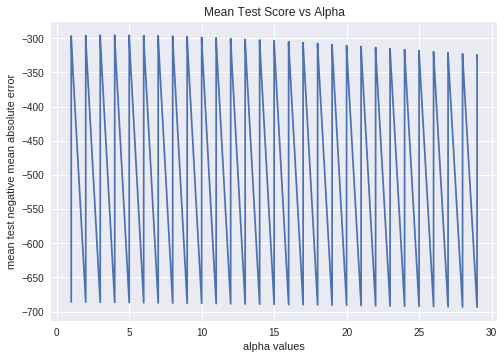

In [0]:
import matplotlib.pyplot as plt
results = pd.DataFrame(gs.cv_results_)
plt.plot(results['param_ridge__alpha'], results['mean_test_score'])
plt.title('Mean Test Score vs Alpha')
plt.ylabel('mean test negative mean absolute error')
plt.xlabel('alpha values')
plt.show()

In [0]:
# Predict with X_test features
y_pred = gs.predict(X_test)

# Compare predictions to y_test labels
test_score = mean_absolute_error(y_test, y_pred)
print('Test Score:', test_score)

Test Score: 329.6998488176086


In [0]:
# Or use the grid search's score method, 
# which combines these steps
test_score = gs.score(X_test, y_test)
print('Test Score:', -test_score)

Test Score: 321.98359011482916


In [0]:
# Which features were selected?
selector = gs.best_estimator_.named_steps['selectkbest']
all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print()
print('Features not selected:')
for name in unselected_names:
    print(name)

In [0]:
#all selected features
selected_features = X_train.columns[gs.best_estimator_.named_steps['selectkbest'].get_support()]


#all unselected features
unselected_features = X_train.columns[~gs.best_estimator_.named_steps['selectkbest'].get_support()]

## BONUS: Recursive Feature Elimination!

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [0]:
from sklearn.feature_selection import RFECV

X_train_scaled = RobustScaler().fit_transform(X_train)
rfe = RFECV(Ridge(alpha=1.0), scoring='neg_mean_absolute_error', cv=3)
X_train_subset = rfe.fit_transform(X_train_scaled, y_train)

all_names = X_train.columns
selected_mask = rfe.support_
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print()
print('Features not selected:')
for name in unselected_names:
    print(name)

In [0]:
#all selected features
selected_features_rfe = X_train.columns[rfe.support_]


#all unselected features
unselected_features_rfe = X_train.columns[~rfe.support_]

In [0]:
X_train_subset = pd.DataFrame(X_train_subset, columns=selected_names)

In [0]:
X_test_subset = rfe.transform(X_test)
X_test_subset = pd.DataFrame(X_test_subset, columns=selected_names)

In [0]:
print(X_train.shape, X_train_subset.shape, X_test.shape, X_test_subset.shape)

(963, 35) (963, 24) (100, 35) (100, 24)


In [0]:
X_test_subset

# RFE again, but with polynomial features and interaction terms!

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_polynomial = poly.fit_transform(X_train)

print(X_train.shape, X_train_polynomial.shape)

(963, 35) (963, 666)


In [0]:
from sklearn.feature_selection import RFECV

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_polynomial)

rfe = RFECV(Ridge(alpha=1.0), scoring='neg_mean_absolute_error', 
            step=10, cv=3, verbose=1)

X_train_subset = rfe.fit_transform(X_train_scaled, y_train)

In [0]:
X_train.shape, X_train_polynomial.shape, X_train_scaled.shape, X_train_subset.shape

((963, 35), (963, 666), (963, 666), (963, 156))

In [0]:
all_names = poly.get_feature_names(X_train.columns)
selected_mask = rfe.support_
selected_names = [name for name, selected in zip(all_names, selected_mask) if selected]

print(f'{rfe.n_features_} Features selected:')
for name in selected_names:
    print(name)

In [0]:
# Define an estimator and param_grid

ridge = Ridge()

param_grid = {
    'alpha': [0, 0.1, 1.0, 4., 10.]
}

# Fit on the train set, with grid search cross-validation
gs = GridSearchCV(ridge, param_grid=param_grid, cv=3, 
                  scoring='neg_mean_absolute_error', 
                  verbose=1)

gs.fit(X_train_subset, y_train)
validation_score = gs.best_score_
print()
print('Cross-Validation Score:', -validation_score)
print()
print('Best estimator:', gs.best_estimator_)
print()

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Cross-Validation Score: 247.80985367683917

Best estimator: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished


In [0]:
# Do the same transformations to X_test
X_test_polynomial = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_polynomial)
X_test_subset = rfe.transform(X_test_scaled)

# Use the grid search's score method with X_test_subset
test_score = gs.score(X_test_subset, y_test)
print('Test Score:', -test_score)

Test Score: 328.57066776770154
